이번에는 여러 특성을 사용한 다중회귀와, 릿지, 라쏘에 대해서 알아보자. 여전히 농어 데이터를 사용하나 차이가 있다면 기존에 농어의 길이만 사용했다면 농어의 길이, 높이, 두께를 전부 사용한다. 그럼 이제 다중 회귀에 대해 간략히 알아보자.

### 다중회귀

 선형회귀와 비슷하나. 그러나 독립 변수가 2개 이상인것. 선형회귀의 경우 에는, $y = ax + b$ 의 형태를 띄고 x,y를 통해 a,b를 찾아 가는 과정이었다. 그러나 두개 독립변수의 다중회귀로 예를 들면 $z = ax + by + c$의 형태를 띄고 z,x,y를 통해 a,b,c를 찾아 가는 과정이라고 보면 된다. 이제 그럼 하나씩 알아보자.

### 라이브러리
라이브러리는 다음과 같다. [k-최근접 이웃 회귀 라이브러리](https://unfinishedgod.netlify.app/2022/04/17/python-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83-%ED%9A%8C%EA%B7%80/#%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC)

In [86]:
import pandas as pd # read_csv() 를 사용하기 위함
import numpy as np # 사이킷 런에 사용할 배열 여기서는 to_numpy()가 사용됨
import matplotlib.pyplot as plt # 시각화
from sklearn.preprocessing import PolynomialFeatures # 사이킷런의 변환기를 위함
from sklearn.model_selection import train_test_split # train/test set 분할
from sklearn.linear_model import LinearRegression # 다중 회귀
from sklearn.preprocessing import StandardScaler # 정규화를 위해 사용하는 StandardScaler()를 사용하기 위함
from sklearn.linear_model import Ridge # 릿지 회귀
from sklearn.linear_model import Lasso # 라쏘 회귀

### 데이터 준비 

이제 데이터를 불러와 보자. 데이터는 웹에 있는 csv를 사용할 예정이다. https://bit.ly/perch.csv 를 pd.read_csv()를 사용해서 불러 온다. 데이터를 불러온 to_numpy()매서드를 사용해서 판다스의 데이터 프레임을 넘파이의 배열로 변경 해준다. 그리고 이를  perch_full로 지정 해주었으며, 농어의 무게는 기존에 있던 대로 불러와 준다.

In [13]:
df = pd.read_csv("https://bit.ly/perch_csv")
perch_full = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### Trian/Test set

이제 perch_full과 perch_weight를 train/test set로 나눠 주자.

In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

### 사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 변환기(transformer)라고 부른다. fit(), transform() 메서드를 사용한다. 우리가 사용할 변환기는 PolynomialFeatures 클래스이다. 잠깐 PolynomialFeatures()에 대해 알아보자면 다항식의 계수를 만들어 준다고 이해 하면 된다. 예를 들어 a,b 를 polynomial화를 시켜서 변환 시켰을때 생성되는 결과는 다음과 같다. 

 - $a,b$ -> $a,b,a^2, ab, b^2$
 
$(a+b)^2 = a^2 + 2ab + b^2$를 연상 하면 조금 더 쉽게 이해 할 수 있다. 한번더 a,b,c

 - $a,b,c$ -> $a,b,c, a^2, ab, ac, b^2, bc, c^2$ 이 생성 된다. 이 자세한 식은 get_feature_names()메서드를 통해서도 확인할 수 있다.
 
 이제 다음 1,2를 예를 들어 보자. 유의 해야할 점이 있다면 fit을 먼저 해준 다음에서야 trainsform을 해야 한다.

In [39]:
poly = PolynomialFeatures()
poly.fit([[1,2]])
print(poly.transform([[1,2]]))

[[1. 1. 2. 1. 2. 4.]]


1,1,2,1,2,4가 변환 되는데 맨 앞에 1은 자동으로 절편(상수)이 추가 된것이다. 이는 include_bias = False 옵션을 사용해 없애줄수 있다.

In [64]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[1,2]])
print(poly.transform([[1,2]]))

[[1. 2. 1. 2. 4.]]


이렇게 이해를 했으니 이를 train_input에 적용해서 확인해보자.

In [53]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


이렇게 생성된 식을 poly.get_feature_names()를 통해 확인해보자. 

In [47]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

이제 test set도 변환을 시켜 주자. test셋은 train set를 기준으로 생성된 fit을 해주는 것이 좋다.

In [56]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델 훈련

이제 다중 회귀 모델을 훈련 시키자.0.99로 아주 높은 점수가 나왔다. 기존의 길이 뿐만 아니라 높이와 두께를 모두 사용한 결과이다.

In [58]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


이제 test set에 대해서도 한번 알아보자.

In [59]:
print(lr.score(test_poly, test_target))

0.9714559911594134


0.97이라는 결과가 나왔다. 이번에는 조금 더 고차항의 다중 회귀를 진행 해보자. degree=5옵션을 주어, 5제곱까지의 특성을 만들어서 다시 훈련을 시켜서 결과를 확인해보자.

In [66]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [67]:
print(lr.score(test_poly, test_target))

-144.40579242684848


train set에서는 아주 강력한 점수가 나왔지만 test의 경우에는 음수가 나와 **과대적합** 이 발생해 아주 형편 없는 점수가 나왔다. 이제 과대적합을 방지하는 방법에 대해 알아보자.

### Regularization 

Regularization은 모델이 train set을 너무 과도하게 학습하지 못하도록 하는것이다. 일반적으로 선형 회귀 모델에 regularizaion을 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않는다. 이를 위해 정규화를 진행해주자. StandardScaler 클래스를 사용한다.

In [69]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

이렇게 표준점수로 변환한 train_scaled, test_scaled가 준비 되었다. 이제 각각 릿지와 라쏘에 대해 알아보자. 선형 회귀 모델에 regularizaion을 추가한 모델을 릿지와 라쏘라고 부른다. 두 모델은 regularizaion을 가하는 방법이 다르다. 릿지는 계수를 제곱한 값을 기준으로 regularizaion을 적용하고, 라쏘는 계수를 절댓값을 기준으로 regularizaion을 적용한다. 일번적으로는 릿지를 조금 더 선호한다. 두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있다. 

### 릿지 회귀 

사이킷런의 sklearn.linear_model안에서 사용할 수 있다. 다음을 확인하고 train, test의 각각의 score를 확인해보자. 앞으로 한꺼번에 확인하기 위해 데이터 프레임화 시켜서 확인해 주자.

In [85]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

train_score = ridge.score(train_scaled, train_target)
test_score = ridge.score(test_scaled, test_target)

pd.DataFrame({"set":['train', 'test'],
             "score": [train_score, test_score]})

,set,score
0,train,0.989610
1,test,0.979069


특성을 많이 사용했음에도 좋은 결과를 내고 있다. regularizaion의 양을 임의로 조절할 수 있다. 이떼 모델을 생설할때 alpha 매개변수로 regularizaion의 강도를 조절할 수 있다. 

- alpha값이 **크면** regularizaion 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도 한다. 
- alpha값이 **작으면** 계수를 죽이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대 적합될 가능성이 더 크다.


여기서 alpha과 같은 사람이 직접 지정해야 하는 파라미터를 하이퍼파라미터라고 부른다. 적절한 alpha 값을 찾는 방법은 alpha값에 대한 $R^2$값의 그래프를 그려 보는 것이다. 이렇게 그려보면서 최적의 score를 찾아보자. alpha값을 0.001에서 100까지 10배찍 늘려 다음과 같은 결과를 확인해보고 하나씩 해석해보자. 시각화를 할때 np.log10을 한 이유는 시각화의 가독성을 위해 x축을 -3,-2,-1,0,1,2로 해두었다.

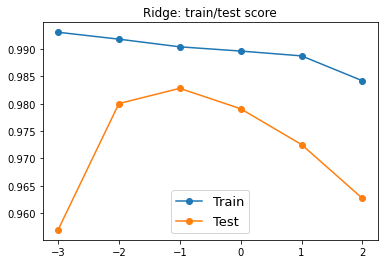

In [101]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha = alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # train, test set 점수 
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score,marker="o",label="Train")
plt.plot(np.log10(alpha_list), test_score,marker="o",label="Test")
plt.title("Ridge: train/test score")

plt.legend()
plt.show()

파란색은 Train, 주황색은 Test. 왼쪽에는 점수차이가 매우 크다. 전형적인 과대적합의 모습을 확인할 수 있고, 오른쪽 편은 둘다 낮아지는 과소 적합을 확인할 수 있다. 최종적으로 우리는 alpha값을 -1즉, 0.1로 선택을 해주도록 하자.

In [95]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

train_score = ridge.score(train_scaled, train_target)
test_score = ridge.score(test_scaled, test_target)

pd.DataFrame({"set":['train', 'test'],
             "score": [train_score, test_score]})

,set,score
0,train,0.990382
1,test,0.982798


### 라쏘 회귀

라쏘 회귀는 릿지와 매우 비슷하다. Ridge클래스를 Lasso로 변경 하면 된다.

In [96]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

train_score = lasso.score(train_scaled, train_target)
test_score = lasso.score(test_scaled, test_target)

pd.DataFrame({"set":['train', 'test'],
             "score": [train_score, test_score]})

,set,score
0,train,0.989790
1,test,0.980059


결과가 아주 맘에든다. 이번에도 alpha값을 조정해 가면서 alpha값을 찾아보자. 이때 경고가 나올수 있는데, 에러가 아니니 무시 해도 되지만 이에 대한 원인은 라쏘 모델의 최적의 계수를 찾는 반복적인 계산에서 지정된 횟수가 부족할때 발생한다. 이 반복 횟수를 충분히 늘리기 위해, max_iter = 10000옵션을 주어 주면 된다. 이제 다음 그래프를 해석해보자.

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


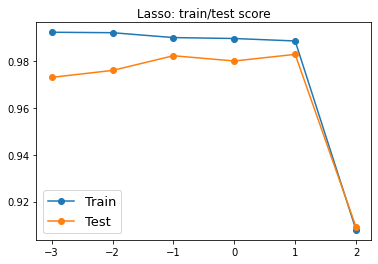

In [107]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha = alpha, max_iter = 10000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # train, test set 점수 
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score,marker="o",label="Train")
plt.plot(np.log10(alpha_list), test_score,marker="o",label="Test")
plt.title("Lasso: train/test score")

plt.legend()
plt.show()

왼쪽에는 과대적합을, 오른쪽에는 과소 적합을 보여 주고 있다. alpha는 1, 즉 10에서 가장 좋은 결과가 나오게 된다. 다시 훈련 시키자.

In [108]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

train_score = lasso.score(train_scaled, train_target)
test_score = lasso.score(test_scaled, test_target)

pd.DataFrame({"set":['train', 'test'],
             "score": [train_score, test_score]})

,set,score
0,train,0.988807
1,test,0.982447


앞에서 라쏘 모델은 계수를 0으로 만들 수 있다고 적어두었다. 즉 다시 말하자면 0인 계수는 사용되지 않았다는 뜻인데 이를 알아보자. 

In [109]:
print(np.sum(lasso.coef_ == 0))

40


총 40개의 계수가 0이 되었다. 55개중 사용된 특성은 15개밖에 되지 않는데, 이때문에 0이 아닌 특성만 골라서 사용할수도 있다.

## 총평

이렇게 다중회귀와, 과적합을 방지 하기 위한 릿지, 라쏘 회귀에 대해 알아보았다.[혼자 공부하는 머신러닝+딥러닝](http://www.yes24.com/Product/Goods/96024871)의 Chapter3(회귀)이 전부 끝났으니 이를 응용하기 위해 데이콘의 전복 나이를 주제로 응용해보자.